<a href="https://colab.research.google.com/github/zulatopaula/MVP_CD_BankChurn/blob/main/PZ_MVP_CD_BankChurn_DE_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Engenharia de Dados
## Profs. Victor Almeida e Silvio Alonso
### Aluna: Paula Zulato

# 1. Introdução e Definição do Objetivo
## Customer Churn
Todo empresa quer manter seus clientes para sustentar seus negócios e com um banco não é diferente. Adquirir novos clientes tem um alto custo, normalmente maior que o custo de reter um cliente.
Abaixo estão os dados dos clientes do ABC Multinational Bank e o objetivo da análise dos dados será prever a rotatividade de clientes (Churn Prediction).

*"O Churn é uma métrica que indica o quanto sua empresa perdeu de receita ou clientes. Para calcular o Churn, basta dividir a quantidade de clientes que perdeu até o final do período pelo total de clientes que iniciaram. Exemplo: se você perdeu 10 clientes de 100 = 10% de Churn Rate" (Fonte: https://resultadosdigitais.com.br/marketing/o-que-e-churn/).*

O dataset usado neste projeto será o Bank Customer Churn Data, com informações de correntintas do banco ABC Multinacional Bank referente a um período de um mês (31/07/2022 a 29/08/2022). O dataset apresenta diversos atributos relacionados a dados de cliente, os produtos bancários consumidos por estes clientes e o balanço da conta bancária. Também possui uma variável de classe binária (0 ou 1) que indica se em algum momento este cliente já deixou o banco por algum período (1) ou se ele nunca deixou o banco (0). Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data


O objetivo deste estudo com fins didáticos é demonstrar a criação de um pipeline de dados usando o framework "medallium" através da plataforma de lakehouse Databricks com Delta Live Tables e montando uma stack de dados utilizando serviços AWS. Serão demonstrados o processo de coleta de dados, modelagem e carga. Então, algumas premissas de análise exploratória serão utilizadas para demonstrar o funcionamento desta infraestrutura e como um problemas de dados pode ser resolvido. Para o problema de dados, serão consideradas algumas premissas.

Como premissas ou hipóteses sobre este problemas, poderíamos prever que o Churn de o cliente pode ser gerado por exemplo por questões econômicas como por exemplo a faixa salarial, ou pode estar relacionado a idade do cliente onde os mais jovens ou mais velhos podem ter uma frequência de abandono maior por ter uma renda não tão previsível ou que está ainda em crescimento (no caso dos mais jovens) ou que pode estar em declínio no caso dos mais velhos). O baixo Score de Crédito também pode ser um motivo para o Churn. Considerando estes pontos de hipóteses, seguirei primeiro com a demonstração da criação do pipeline de dados e depois para a análise dos dados.

Observação: Lancei mão do Python em algumas situações por ter mais expertise nele que no SQL. Faço o 'disclaimer' de que o uso do SQL é mais adequado em situações reais considerando que ele é uma linguagem para gerenciar dados, especialmente em relational database management system. Particularmente útil para lidar com dados estruturadas. Também fiz uso do PySpark.

# 2. Catálogo de Dados
## Informações sobre os atributos

1. **_c0** - **customer_id** - Identificador único do cliente
2. **_c1** - **credit_score** - Valor numérico que indica a saúde de crédito de um cliente, geralmente emitido por um Bureau de Crédito
3. **_c2** - **country** - País de Origem de um cliente
4. **_c3** - **gender** - Identificação de gênero do cliente
5. **_c4** - **age** - Idade do cliente em anos
6. **_c5** - **tenure** - Tempo de existência da conta em anos
7. **_c6** - **balance** - Valor monetário total de depósito em conta
8. **_c7** - **products_number** - A quantidade de produtos do banco que um cliente possui
9. **_c8** - **credit_card** - Indica se o cliente possui cartão de crédito (1) ou não (0)
10. **_c9** - **active_member** - Indica se o cliente está ativo (1) ou não (0)
11. **_c10** - **estimated_salary** - Salário estimado do cliente
12. **_c11** - **churn** - Indica se o cliente já deixou a base em algum momento (1) ou não (0)

# 3. Coleta e armazenamento dos Dados
## Coleta
Optei por baixar o dataset do Kaggle e armazenar uma cópia dele no meu GitHub (https://github.com/zulatopaula/MVP_CD_BankChurn). O dataset que já vinha sendo utilizados para as outras duas sprints anteriores e foi carregado manualmente para um Storage na Cloud AWS usando o serviço "Amazon S3 Storage" de nome "_databricks-workspace-stack-f4cd3-bucket_". Para fins de segurança o Storage foi mantido como privado e utilizando o padrão de encriptação "SSE-S3".

**Figura 1**
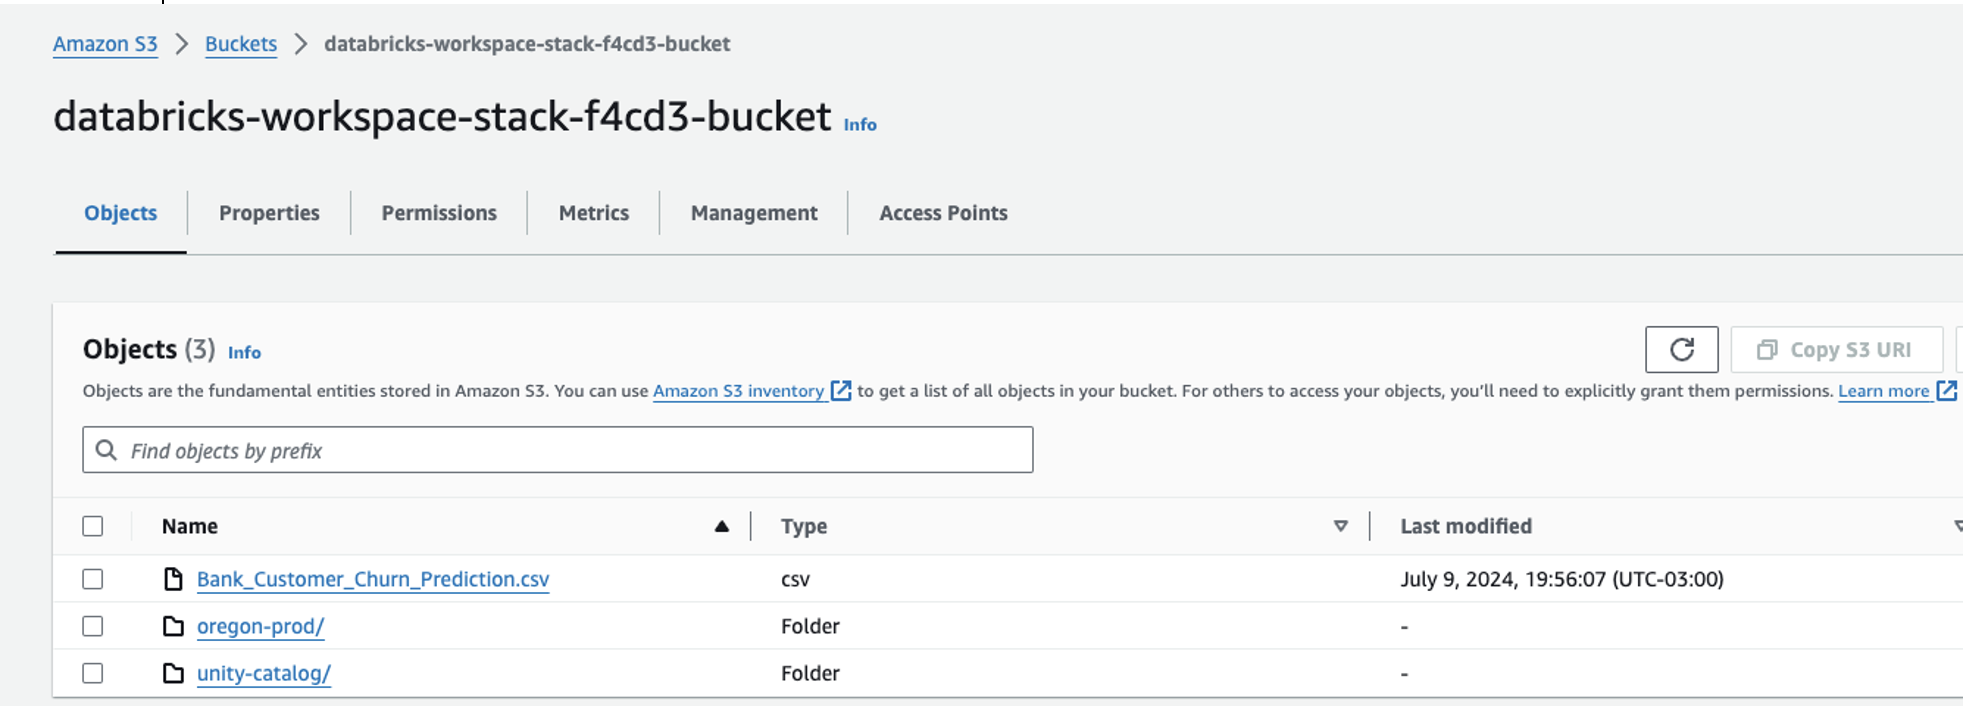

## Armazenamento e transferência de dados
Optei por realizar a comunicão entre a plataforma de lakehouse Databricks e a Cloud AWS comunicando meu bucket do "Amazon S3 Storage" diretamente com o serviço de Cluster da Databricks. Para isso, usei os serviços de _roles_ e policy da AWS para gerar esta comunicação com o meu Databricks Cluster, "Paula Zulato's Cluster". Usei a _role_ "ec2_role" e a _policy_ "ec2_policy". Optei pelo uso de um cluster Single Node para fins didáticos e por limitação de custos, porém, a depender do workload  que for gerado para um cenário real e a depender da criticidade e impacto que a falha deste workload possa gerar para o business em questão, é recomendada a utilização de um cluster multi-node mitigando falhas.

**Figura 2**


**Figura 3**




# 4. Carga/ETL e Pipeline de Dados com framework Medallium
## Carga
Para a carga

**Figura 1**


## Armazenamento e transferência de dados
Optei por realizar a comunicação entre a plataforma de lakehouse Databricks e a Cloud AWS comunicando meu bucket do "Amazon S3 Storage" diretamente com o serviço de Cluster da Databricks. Para isso, usei os serviços de _roles_ e policy da AWS para gerar esta comunicação com o meu Databricks Cluster, "Paula Zulato's Cluster". Usei a _role_ "ec2_role" e a _policy_ "ec2_policy".

**Figura 2**


**Figura 3**

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
import dlt
from pyspark.sql.functions import col
import pandas as pd
from pyspark.sql.functions import when, col

In [ ]:
#Comunicação com o Amazon S3 Storage para acessar o CSV
csv_path = "s3://databricks-workspace-stack-f4cd3-bucket/Bank_Customer_Churn_Prediction.csv"


## Criação de uma Arquitetura Medallium
Camada Bronze

In [ ]:
%sql
--Criação de uma tabela bronze para arquitetura Medallium
DROP TABLE IF EXISTS bronze_general_table;

In [ ]:
# Ler o CSV e gravar em uma tabela bronze
dataset_spark = spark.read.csv(csv_path)
dataset_spark.write.mode("overwrite").saveAsTable("bronze_general_table")

Por se tratar de uma camada "Bronze", apenas copiei os dados de origem do Amazon S3 Storage trazendo-o íntegro para análise e armazendo como raw na camada Bronze. Após gravar as informações na tabela bronze segui fazendo uma avaliação breve do conteúdo da tabela através do dataset usando pySpark.

In [ ]:
# Mostrando o sumário estátisco do dataset
display(dataset_spark.describe())

summary,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11
count,10001,10001,10001,10001,10001,10001,10001,10001,10001,10001,10001,10001
mean,1.56909405694E7,650.5288,null,null,38.9218,5.0128,76485.88928799999,1.5302,0.7055,0.5151,100090.23988099997,0.2037
stddev,71936.18612274846,96.65329873613044,null,null,10.487806451704616,2.8921743770496855,62397.405202385664,0.5816543579989899,0.45584046447513055,0.49979692845891177,57510.49281769815,0.4027685839948687
min,15565701,350,France,Female,18,0,0,1,0,0,100015.79,0
max,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [ ]:
# Avaliando possível conteúdo  IsNull
null_counts = dataset_spark.select([sum(col(c).isNull().cast("int")).alias(c) for c in dataset_spark.columns])

display(null_counts)

_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11
0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Group by all columns to find duplicates
duplicates = dataset_spark.groupBy(dataset_spark.columns) \
    .count() \
    .where(col("count") > 1)

# Display the count of duplicate rows
duplicate_count = duplicates.count()
display(duplicate_count)

0

In [ ]:
%sql
--Demonstrando os dados existentes nesta tabela usando o comando Select do SQL e limitando a 10 registros
SELECT * FROM bronze_general_table LIMIT 10

_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11
customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15634602,619,France,Female,42,2,0,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0
15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
15592531,822,France,Male,50,7,0,2,1,1,10062.8,0
15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15792365,501,France,Male,44,4,142051.07,2,0,1,74940.5,0


Percebemos que o conteúdo de NA ou ISNull para este dataset é vazio para todos os campos. O resultado da avaliação de duplicados é 0. Ou seja, temos um dataset de 10.000 linhas onde todas as colunas são preenchidas e nenhuma linha está duplicada.

Analisando o resumo estatístico, avalianção de IsNull e duplicados podemos perceber que:

Os campos com valor mínimo zero não indicam serem valores nulos, visto que para todos eles é possível que o valor seja zero e não nulo ('Ternure" = cliente com menos de 1 ano na base, 'Balance' = cliente com saldo zero em conta).
Mais pra frente farei uma avalição mais profunda em relação a ocorrência de Balance 0.
Para os demais campos os valores mínimo igual a zero encontrados podem estar sendo tratados como encoding ou são binários, como 'Credit_Card' ou 'Churn', visto que seus valores máximo são iguais a 1.
O valor mínimo para 'Age' é 18, o que é possível considerando que esta deve ser a idade mínima Mundial considerada para que alguém possa abrir uma conta bancária.

## Criação de uma Arquitetura Medallium
Camada Silver

Transformação dos Dados

**Tratamento de Missings e Limpeza**

Observamos na etapa de Análise de Dados que o dataset Bank Churn não tem missings aparentes, nem valores "0" que possam aparentar serem missings. Entendo que o campo 'balance' pode realmente conter o valor 0 considerando que em algum momento o cliente pode simplesmente não ter valor em conta.

Considerando que, em uma situação real, estes dados possam ser usados pela camada de business da companhia, por exemplo para projetos de Machine Learning, criarei uma nova tabela materializando uma camada Silver transformando dados das colunas 'age' e 'tenure' em faixas de dados para reduzir o volume dos dados a serem manipulados pelo modelo.

Também removerei a coluna 'customer_id', pois considero que esta não é uma informação relante para a análise e com o intuito de tornar o dado ainda mais anonimizado e o rol de análise menor e portanto mais leve para o Modelo Preditivo. Removerei também as colunas 'age' e 'tenure' após transformar os dados das mesmas em faixas para reduzir o volume dos dados a serem manipulados pelo modelo. Nenhuma outra coluna e nenhuma linha serão removidas, pois entendo que todos os atributos atuais possam ser relevantes para uma futura análise preditiva. Entretanto irei rebalancear a variável alvo desta análise 'churn'.



In [ ]:
%sql
--Criação de uma tabela silver para arquitetura Medallium
DROP TABLE IF EXISTS silver_general_table;

In [ ]:
# Criação de uma nova coluna 'faixa_idade'

dataset_spark = dataset_spark.withColumn(
    'faixa_idade',
    when((col('_c4') >= -100) & (col('_c4') <= 25), 'De 0 até 25 anos')
    .when((col('_c4') > 25) & (col('_c4') <= 35), 'De 26 até 35 anos')
    .when((col('_c4') > 35) & (col('_c4') <= 50), 'De 36 até 50 anos')
    .when((col('_c4') > 50) & (col('_c4') <= 60), 'De 51 até 60 anos')
    .when((col('_c4') > 60) & (col('_c4') <= 70), 'De 61 até 70 anos')
    .when((col('_c4') > 70) & (col('_c4') <= 80), 'De 71 até 80 anos')
    .when((col('_c4') > 80) & (col('_c4') <= 90), 'De 81 até 90 anos')
    .when((col('_c4') > 90) & (col('_c4') <= 100), 'De 91 até 100 anos')
    .when((col('_c4') > 100), 'Maior que 100 anos')
    .otherwise(None) # For ages outside the specified bins
)

faixa_idade_counts = dataset_spark.groupBy('faixa_idade').count().orderBy(col('faixa_idade').asc())

display(faixa_idade_counts)

faixa_idade,count
null,1
De 0 até 25 anos,611
De 26 até 35 anos,3542
De 36 até 50 anos,4586
De 51 até 60 anos,797
De 61 até 70 anos,331
De 71 até 80 anos,121
De 81 até 90 anos,10
De 91 até 100 anos,2


In [ ]:
# Ler o CSV e gravar em uma tabela silver
dataset_spark_silver = spark.createDataFrame(dataset_spark.toPandas())
dataset_spark_silver.write.mode("overwrite").saveAsTable("silver_general_table")

In [ ]:
%sql
--Demonstrando os dados existentes na nova tabela silver usando o comando Select do SQL e limitando a 10 registros
SELECT * FROM silver_general_table LIMIT 10

_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11,faixa_idade
15710408,584,Spain,Female,38,3,0,2,1,1,4525.4,0,De 36 até 50 anos
15598695,834,Germany,Female,68,9,130169.27,2,0,1,93112.2,0,De 61 até 70 anos
15649354,754,Spain,Male,35,4,0,2,1,1,9658.41,0,De 26 até 35 anos
15737556,590,France,Male,43,7,81076.8,2,1,1,182627.25,1,De 36 até 50 anos
15671610,740,France,Male,36,7,0,1,1,1,13177.4,0,De 36 até 50 anos
15625092,502,Germany,Female,57,3,101465.31,1,1,0,43568.31,1,De 51 até 60 anos
15741032,733,France,Male,48,5,0,1,0,1,117830.57,0,De 36 até 50 anos
15750014,755,Germany,Female,37,0,113865.23,2,1,1,117396.25,0,De 36 até 50 anos
15784761,554,Spain,Female,46,7,87603.35,3,0,1,96929.24,1,De 36 até 50 anos
15768359,534,France,Male,36,4,120037.96,1,1,0,36275.94,0,De 36 até 50 anos


## Criação de uma Arquitetura Medallium
Camada Gold

Disponibilização em uma View

In [ ]:
%sql
CREATE OR REPLACE VIEW mv_gold_general_table
AS
SELECT *
FROM silver_general_table;

In [ ]:
%sql
--Demonstrando os dados existentes na nova tabela silver usando o comando Select do SQL e limitando a 10 registros
SELECT * FROM mv_gold_general_table LIMIT 10

_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11,faixa_idade
15710408,584,Spain,Female,38,3,0,2,1,1,4525.4,0,De 36 até 50 anos
15598695,834,Germany,Female,68,9,130169.27,2,0,1,93112.2,0,De 61 até 70 anos
15649354,754,Spain,Male,35,4,0,2,1,1,9658.41,0,De 26 até 35 anos
15737556,590,France,Male,43,7,81076.8,2,1,1,182627.25,1,De 36 até 50 anos
15671610,740,France,Male,36,7,0,1,1,1,13177.4,0,De 36 até 50 anos
15625092,502,Germany,Female,57,3,101465.31,1,1,0,43568.31,1,De 51 até 60 anos
15741032,733,France,Male,48,5,0,1,0,1,117830.57,0,De 36 até 50 anos
15750014,755,Germany,Female,37,0,113865.23,2,1,1,117396.25,0,De 36 até 50 anos
15784761,554,Spain,Female,46,7,87603.35,3,0,1,96929.24,1,De 36 até 50 anos
15768359,534,France,Male,36,4,120037.96,1,1,0,36275.94,0,De 36 até 50 anos


# 5. Análise


Avaliando a distribuição por Gênero (gender), por Idade (age) e por Churn (churn), com o intuito de medir o balanceamento do dataset.

In [ ]:
%sql
-- Distribuição por gênero
SELECT _c3, COUNT(*) AS total
FROM mv_gold_general_table
GROUP BY _c3;

_c3,total
Female,4543
gender,1
Male,5457


In [ ]:
%sql
--Distribuição por idade
SELECT _c4, COUNT(*) AS total
FROM mv_gold_general_table
GROUP BY _c4;

_c4,total
51,119
54,84
29,348
69,22
42,321
73,13
64,37
30,327
34,447
59,62


In [ ]:
%sql
--Distribuição por churn
SELECT _c11, COUNT(*) AS total
FROM mv_gold_general_table
GROUP BY _c11;

_c11,total
0,7963
1,2037
churn,1


Podemos perceber que em relação ao Gênero existem 5457 Homens (Male) sobre uma base total de 10.000 clientes (55% Homens contra 45% Mulheres). Assim, podemos considerar que esta base em relação a Gênero está balanceada. Percebemos que em relação ao Churn existem 7963 clientes que nunca saíram da base (0 = Retained) e 2037 clientes que já cancelaram o serviço definitivamente ou por um período (1 = Churned). Assim podemos considerar que em relação a Churn esta é uma base desbalanceada (79.6% Retained e 20.4% Churned). Mais adiante farei uma análise mais aprofundada em relação ao Churn. Fazendo uma avaliação em relação a idade, a análise é inconclusiva.